In [1]:
import glob
import numpy as np
from sklearn.model_selection import KFold
from tqdm import tqdm

from torch.utils.data import DataLoader

from utils import EEGDataset
file_paths = np.array(glob.glob("/data1/share_data/purdue/s1/time_norm/*.pkl"))


train_dataset = EEGDataset(file_paths)

train_loader = DataLoader(
    train_dataset,
    batch_size=128,
)
xx=[]
for x, y in tqdm(train_loader):
    
    # 假设 images 是一个形状为 (batch_size, channels, height, width) 的张量
    max_values = x.amax(dim=[2, 3])  # 在高和宽维度上求最大值
    min_values = x.amin(dim=[2, 3])  # 在高和宽维度上求最小值
    ranges = max_values - min_values  # 计算范围
    xx.append(ranges)
    # print(ranges)  # 输出 (batch_size,)
ranges = np.concatenate(xx, axis=0)
print(ranges.shape)

100%|██████████| 313/313 [01:34<00:00,  3.30it/s]

(40000, 1)


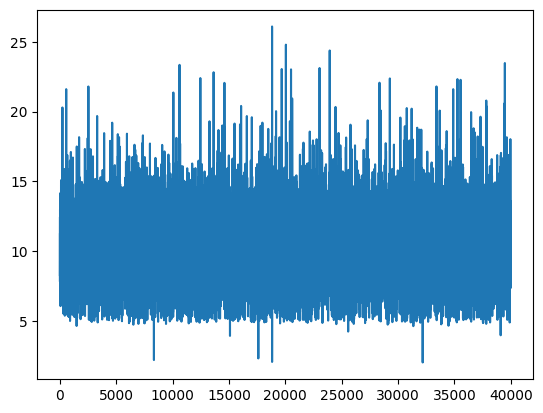

In [2]:
# plot ranges
import numpy as np
import matplotlib.pyplot as plt
plt.plot(ranges)

In [11]:

false_num = (ranges < 14).sum()

In [12]:
false_num

39044